# Maven Roasters: Coffee Shop Sales Analysis

## 1. Data Loading and Initial Exploration

First, let's import necessary libraries and load our dataset.

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Set display options for better notebook rendering
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [5]:
# Load the dataset
df = pd.read_csv(r'coffee-shop-sales-revenue.csv', sep='|')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns present in the dataset:")
for col in df.columns:
    print(f"- {col}")

Dataset Shape: (149116, 11)

Columns present in the dataset:
- transaction_id
- transaction_date
- transaction_time
- transaction_qty
- store_id
- store_location
- product_id
- unit_price
- product_category
- product_type
- product_detail


## 2. Checking for missing values

In [7]:
# Display detailed information about the dataset
print("Detailed Dataset Information:")
df.info()

Detailed Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


Dataset is clean

## 3. Data Preprocessing

In [8]:
# Create datetime column and extract useful features
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'] + ' ' + df['transaction_time'])
df['hour'] = df['transaction_datetime'].dt.hour
df['day_of_week'] = df['transaction_datetime'].dt.day_name()
df['date'] = df['transaction_datetime'].dt.date
df['month'] = df['transaction_datetime'].dt.month
df['day'] = df['transaction_datetime'].dt.day
df['total_amount'] = df['transaction_qty'] * df['unit_price']

print("Updated columns after preprocessing:")
print(df.columns.tolist())

Updated columns after preprocessing:
['transaction_id', 'transaction_date', 'transaction_time', 'transaction_qty', 'store_id', 'store_location', 'product_id', 'unit_price', 'product_category', 'product_type', 'product_detail', 'transaction_datetime', 'hour', 'day_of_week', 'date', 'month', 'day', 'total_amount']


## 4. Initial Data Exploration

### 4.1 Numerical Variables Summary

Summary Statistics for Numerical Variables:


,transaction_id,transaction_qty,store_id,product_id,unit_price,transaction_datetime,hour,month,day,total_amount
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219,2023-04-16 00:04:47.989404160,11.735790,3.988881,15.622576,4.686367
min,1.000000,1.000000,3.000000,1.000000,0.800000,2023-01-01 07:06:11,6.000000,1.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000,2023-03-06 13:37:08,9.000000,3.000000,8.000000,3.000000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000,2023-04-24 08:24:32.500000,11.000000,4.000000,16.000000,3.750000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000,2023-05-30 07:16:13,15.000000,5.000000,23.000000,6.000000
max,149456.000000,8.000000,8.000000,87.000000,45.000000,2023-06-30 20:57:19,20.000000,6.000000,31.000000,360.000000
std,43153.600016,0.542509,2.074241,17.930020,2.658723,NaN,3.764662,1.673091,8.591213,4.227099


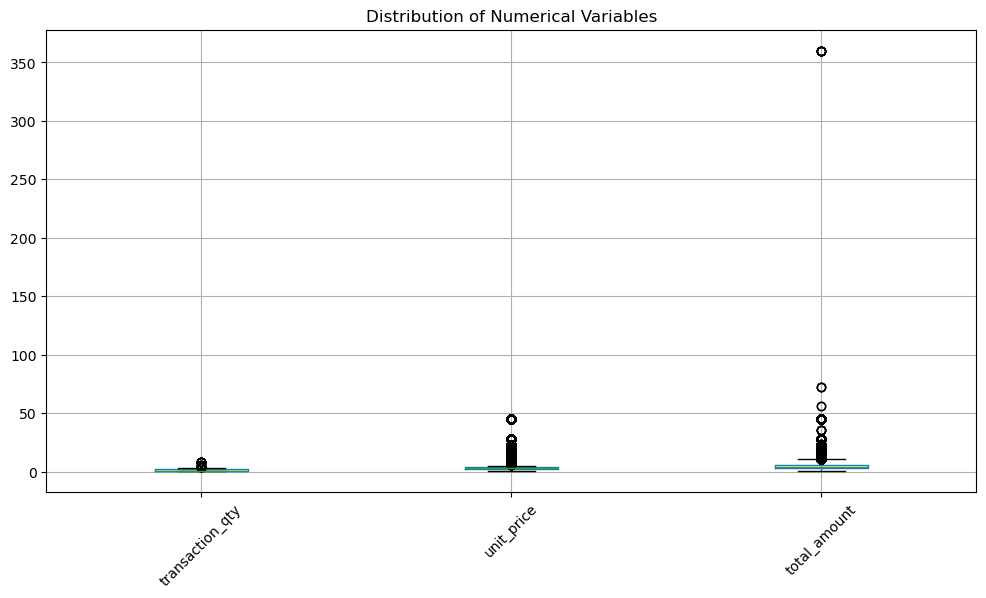

In [10]:
# Display summary statistics for numerical columns
print("Summary Statistics for Numerical Variables:")
display(df.describe())

# Create a box plot for numerical variables
plt.figure(figsize=(12, 6))
df[['transaction_qty', 'unit_price', 'total_amount']].boxplot()
plt.title('Distribution of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

### 4.2 Categorical Variables Analysis


Analysis of store_location:


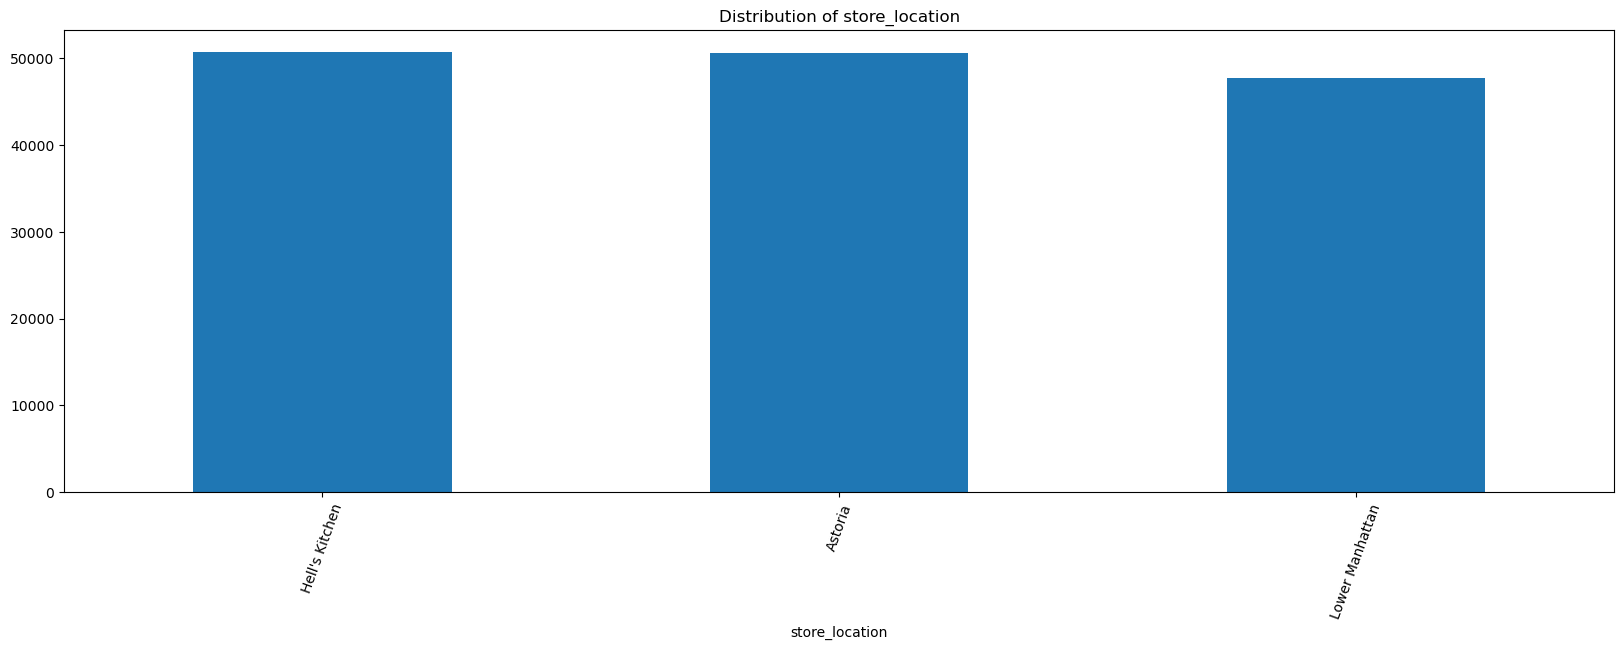


Analysis of product_category:


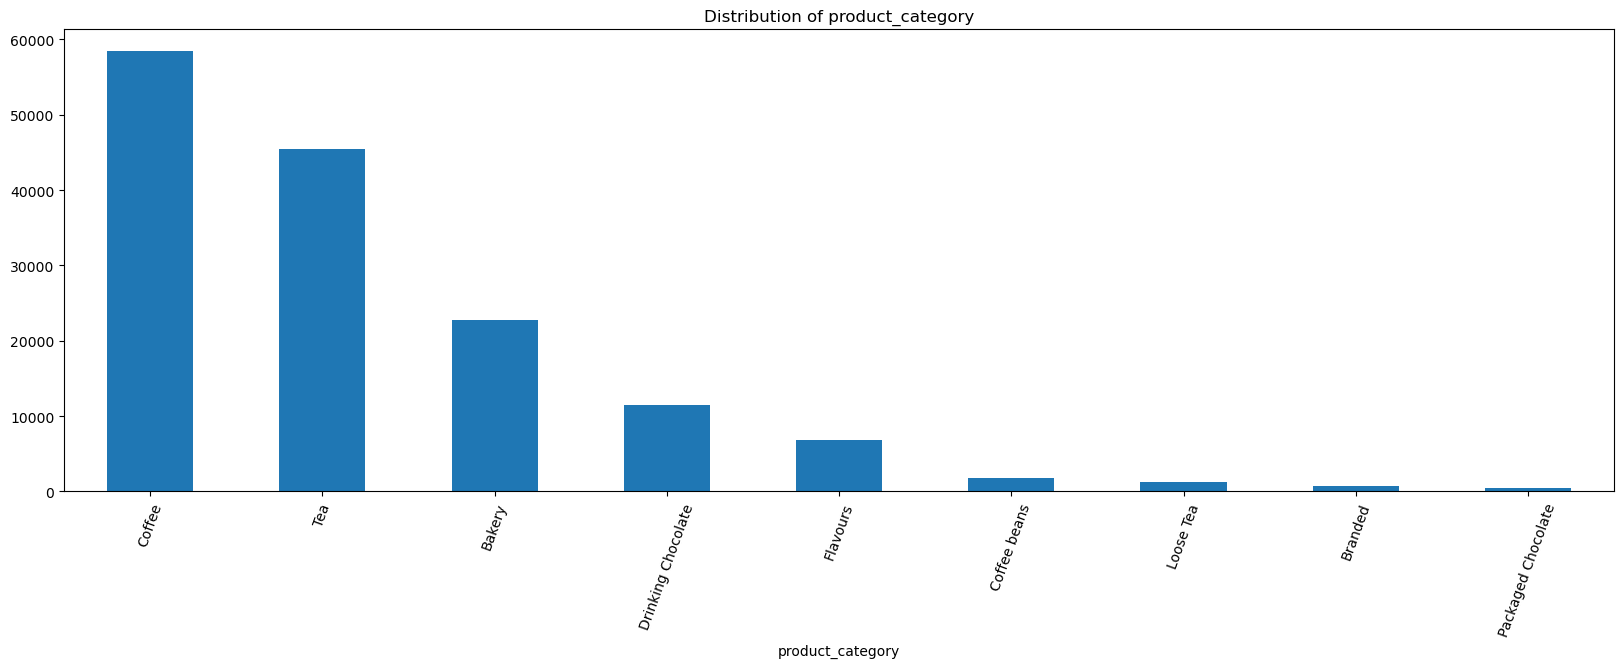


Analysis of product_type:


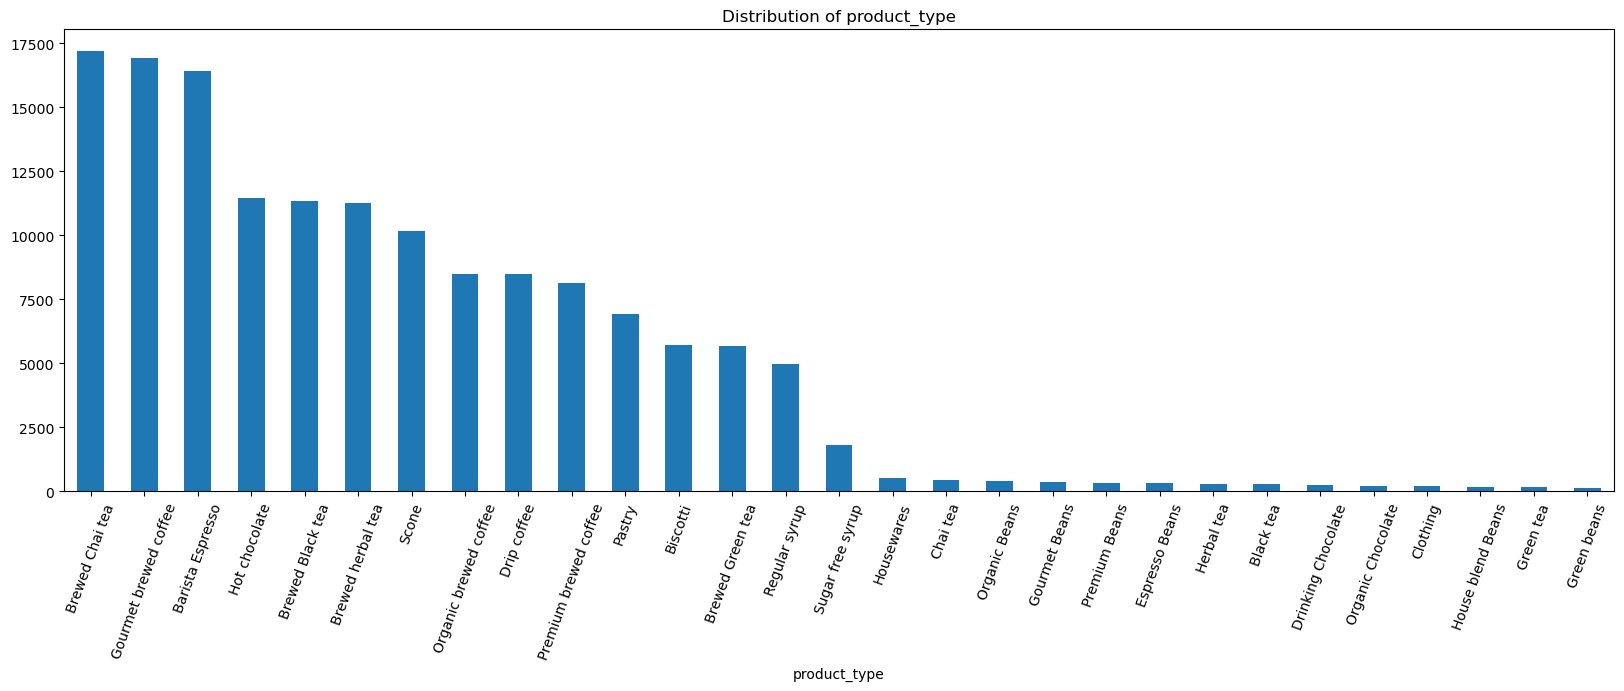

In [16]:
# Function to analyze categorical variables
def analyze_categorical(df, column):
    print(f"\nAnalysis of {column}:")
    # print("\nValue Counts:")
    # display(df[column].value_counts())
    # print("\nPercentage Distribution:")
    # display(df[column].value_counts(normalize=True).mul(100).round(2))
    
    # Create a bar plot
    plt.figure(figsize=(20, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=70)
    plt.show()

# Analyze each categorical variable
categorical_columns = ['store_location', 'product_category', 'product_type']
for col in categorical_columns:
    analyze_categorical(df, col)

### 4.3 Time-Based Analysis

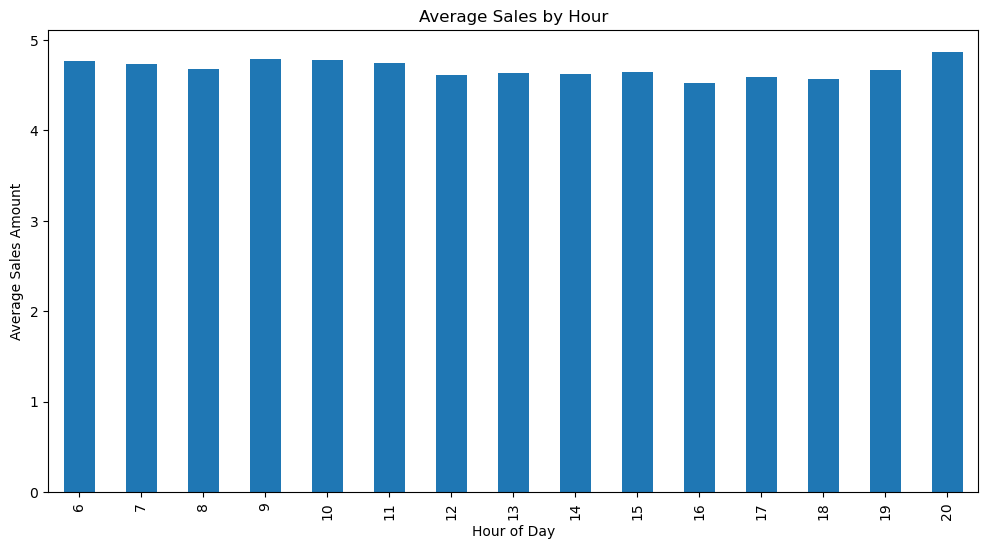

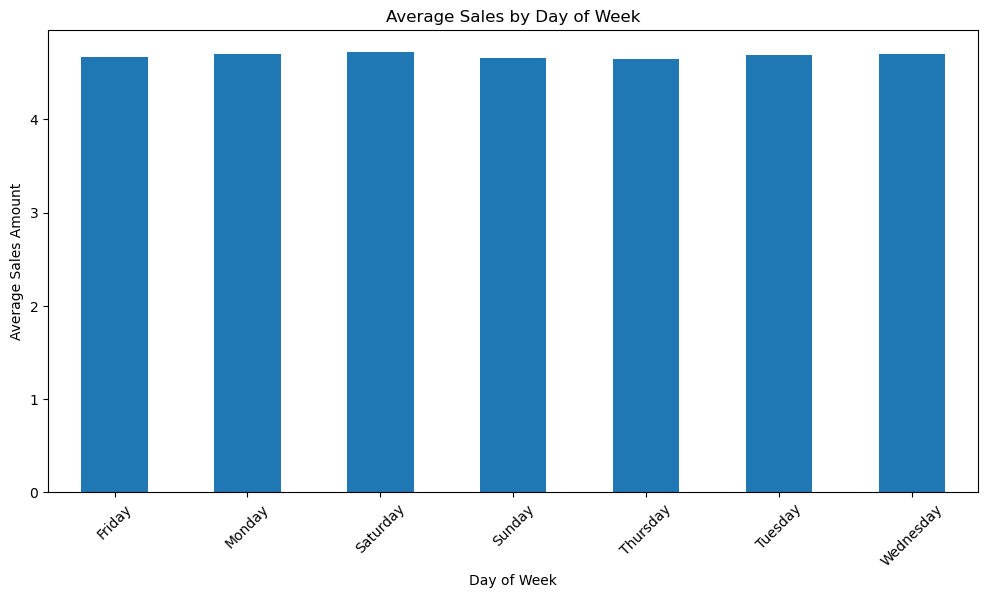

In [15]:
# Analyze hourly patterns
plt.figure(figsize=(12, 6))
df.groupby('hour')['total_amount'].mean().plot(kind='bar')
plt.title('Average Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sales Amount')
plt.show()

# Analyze daily patterns
plt.figure(figsize=(12, 6))
df.groupby('day_of_week')['total_amount'].mean().plot(kind='bar')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=45)
plt.show()

## Observations

Based on the exploration till now, here are some key observations:

1. Dataset Structure
    - Time period of transactions is of <ins>6 months</ins>
    - No of Stores are <ins>3</ins>

2. Sales Patterns:
    - Peak hours <ins>are nearly every hour</ins>
    - Busiest Days are <ins>nearly all days</ins>
    - Average transaction cost is <ins>4.686367</ins>

3. Product Insights:
    - Most popular categories are: 
    - Price range of products:

Bias based Observation
- Since the data itself is synthetic, some parts of it dont look realistic, specifically the peak hours, busiest days and Amount of transactions in each branch - which all look similar



## Business Questions Based on Observations of transactions and bias

1. Revenue Optimization
   - ~~What are our peak hours and how can we optimize staffing?~~
   - Which products contribute most to our revenue?
   - Are there opportunities for time-based pricing?

3. Store Operations
   - ~~How do store performances compare?~~
   - ~~What are store-specific peak times?~~

4. Customer Behavior
   - ~~How do purchasing patterns vary by time/day?~~


Some questions have been left out due to the data itself not having any variation in a lot of the cases

### Which products contribute most to our revenue?

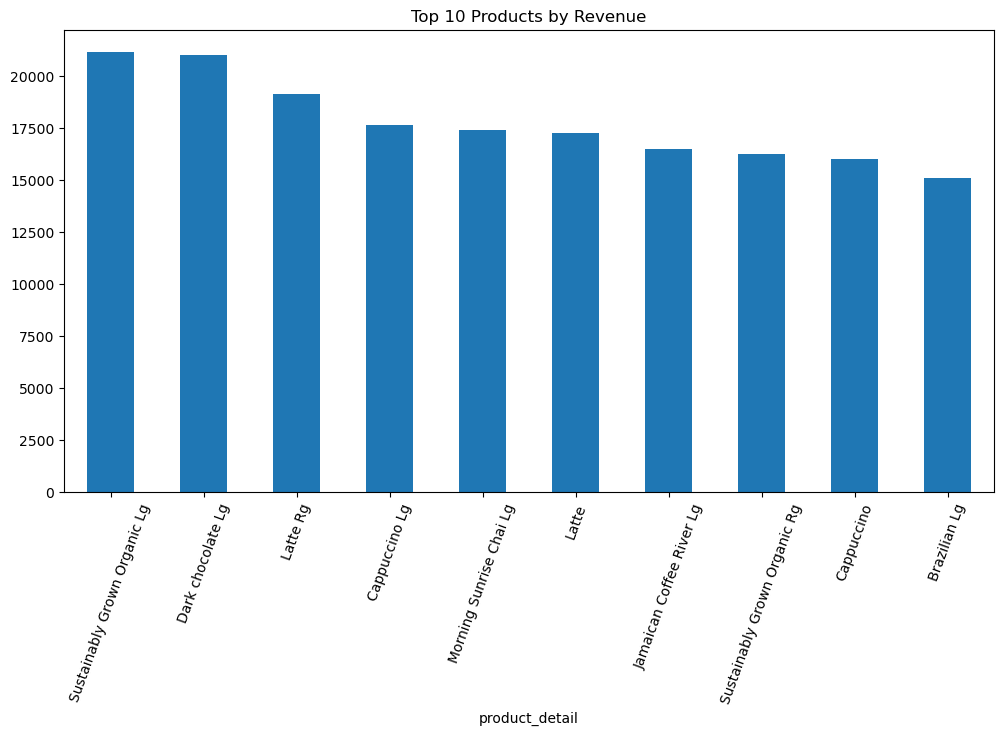

In [18]:
# 1. Product revenue analysis
product_revenue = df.groupby('product_detail').agg({
    'total_amount': ['sum', 'mean'],
    'transaction_qty': 'sum'
}).round(2)

# 2. Category analysis
category_revenue = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)

# 3. Visualize top products
plt.figure(figsize=(12, 6))
top_10_products = product_revenue['total_amount', 'sum'].sort_values(ascending=False).head(10)
top_10_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.xticks(rotation=70)
plt.show()

### Are there opportunities for time-based pricing?

This question should have been omitted but it can be answered with a plan instead

The plan would be to introduce discounts at important times.
Maybe in the form of 
- Bundle based discounts during breakfast, lunch and other common times of food consumption
- End of day sale ( for baked goods )


## 5 Business Recommendations

1. Revenue Enhancement
   - Implement happy hour pricing during important meal times (breakfast, lunch, tea time, dinner etc) and on certain food related days (world coffee day for example)
   - Introduce bundle deals for frequently combined products

2. Product Optimization
   - Consider removing underperforming products
   - Implement a base small menu and a rotating seasonal menu, this will match well with tea, coffee and baked products as they are had all across the year
   - If some locations are having a drought in revenue, implement a location based exclusive menu item (or make it so it is available slight before the other locations)
   - Consider creating fake hype for semipopular products, as there will be people who like it, so make it so it rotates in and out to keep the hype up

3. Customer Experience
   - Introduce loyalty program targeting repeat customers 
   - Expand more towards social media for sharing of promotions and exclusive items across branches, has possibilties of increased sales via virality. (Possible to collaborate with influencers for promotion of new items)

Due the data itself being so monotone in terms of variation, im not currently looking into trends and possible predictions/estimation of revenue.
It is possible to expand onto this with further synthetic data generation of
- weather during the 6 months
- any important days/festivals/celebrations that might affect the sales
- and a lot more things